Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv('/content/Sales ML 1.csv')


In [4]:
# first 5 rows of the dataframe
data.head()

Category                Sub category    PRODUCT BRANDS  Order Date  \
0  NON FOOD       NATURAL PERSONAL CARE          EYE DROP  04-04-2022   
1      FOOD  JUICES & NATURAL BEVERAGES          MEDICINE  04-04-2022   
2      FOOD  JUICES & NATURAL BEVERAGES   SHARBAT THANDAI  04-04-2022   
3      FOOD         PHYSICAL OIL & GHEE              GHEE  04-04-2022   
4      FOOD  JUICES & NATURAL BEVERAGES  MURRABBA & CANDY  04-04-2022   

   Item Code                    Item Name  Item Disc %  Item disc amount  \
0      71076        SAUMYA EYE DROP 10 ML          8.0          2.500000   
1      70853  GILOY GHAN VATI 60 PC (NEW)         10.0          8.928571   
2       1095         GULAB SHARBAT 750 ML          8.0          6.779661   
3       1379             COWS GHEE 15 LTR          8.3       3855.053571   
4       1025    AMLA CHATPATA CANDY 500 G         10.0        325.714286   

   Profit %  Item Net Amount     profit   MRP     Net cost  quantity  \
0  16.53831            32.20    4.08000    35    31.250000         1   
1  13.98176            90.00    9.85714   100    89.285714         1   
2  16.76816            92.00   11.19610   100    84.745763         1   
3   0.52727         47702.34  223.39500  8670  7741.071429         6   
4  13.67105          3078.00  352.55857   180   171.428571        19   

      Sales  weight  
0     31.25   0.030  
1     89.29   0.060  
2     84.75   1.130  
3  46446.43  86.880  
4   3257.14  11.381

In [5]:
# number of data points & number of features
data.shape

(15856, 16)

In [6]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          15856 non-null  object 
 1   Sub category      15856 non-null  object 
 2   PRODUCT BRANDS    15856 non-null  object 
 3   Order Date        15856 non-null  object 
 4   Item Code         15856 non-null  int64  
 5   Item Name         15856 non-null  object 
 6   Item Disc %       15856 non-null  float64
 7   Item disc amount  15856 non-null  float64
 8   Profit %          15856 non-null  float64
 9   Item Net Amount   15856 non-null  float64
 10  profit            15856 non-null  float64
 11  MRP               15856 non-null  int64  
 12  Net cost          15856 non-null  float64
 13  quantity          15856 non-null  int64  
 14  Sales             15856 non-null  float64
 15  weight            15856 non-null  float64
dtypes: float64(8), int64(3), object(5)
memor

Categorical Features:
- Category
- Sub category
- PRODUCT BRANDS
- Order Date
- Item Name


In [7]:
# checking for missing values
data.isnull().sum()

Category            0
Sub category        0
PRODUCT BRANDS      0
Order Date          0
Item Code           0
Item Name           0
Item Disc %         0
Item disc amount    0
Profit %            0
Item Net Amount     0
profit              0
MRP                 0
Net cost            0
quantity            0
Sales               0
weight              0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [8]:
# mean value of "Weight" column
data['weight'].mean()

2.139942167003027

Data Analysis

In [9]:
data.describe()

Item Code   Item Disc %  Item disc amount      Profit %  \
count  1.585600e+04  15856.000000      15856.000000  15856.000000   
mean   1.276555e+07      5.244960         38.214237     19.015875   
std    4.587819e+07      5.702808        112.041718    103.522553   
min    1.015000e+03      0.000000          0.000000    -98.789550   
25%    7.008000e+04      0.000000          0.000000      7.769217   
50%    7.227400e+04      7.000000          1.785714     13.673010   
75%    8.124400e+04     10.000000         18.750000     18.691540   
max    1.800075e+08     99.500000       3942.857143   3089.356660   

       Item Net Amount        profit           MRP      Net cost     quantity  \
count     15856.000000  15856.000000  15856.000000  15856.000000  15856.00000   
mean        631.451365     37.938506    113.590565    102.243051      8.57997   
std        1401.224148     95.121062    240.485730    216.399086     28.02450   
min           0.830000  -1308.500340      1.000000      0.847458      1.00000   
25%          27.600000      2.503520     15.000000     15.000000      1.00000   
50%          77.635000      7.387830     50.000000     42.857143      2.00000   
75%         542.800000     36.447860    100.000000     89.523810      8.00000   
max       47702.340000   2059.650000   8670.000000   7741.071429   1800.00000   

              Sales        weight  
count  15856.000000  15856.000000  
mean     627.481983      2.139942  
std     1378.675447      5.822805  
min        0.850000      0.001000  
25%       28.570000      0.084000  
50%       76.190000      0.276000  
75%      542.860000      1.140000  
max    46446.430000    257.000000

Numerical Features

In [10]:
sns.set()

<ipython-input-11-cfac0ad5156f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weight'])


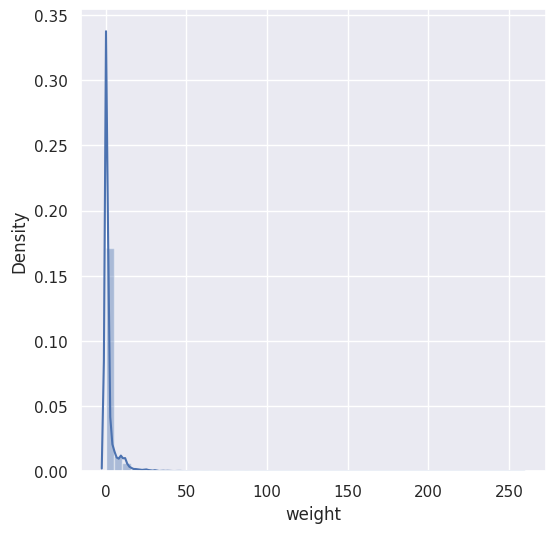

In [11]:
# Item Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['weight'])
plt.show()

<ipython-input-12-fd6614d7dc66>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MRP'])


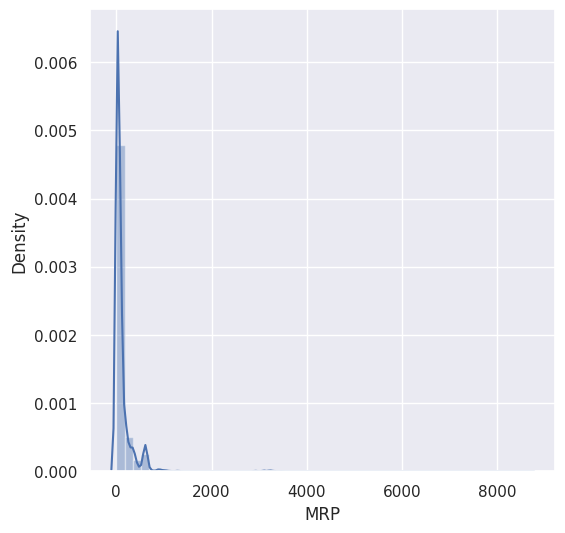

In [12]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['MRP'])
plt.show()

<ipython-input-13-287d1584873a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])


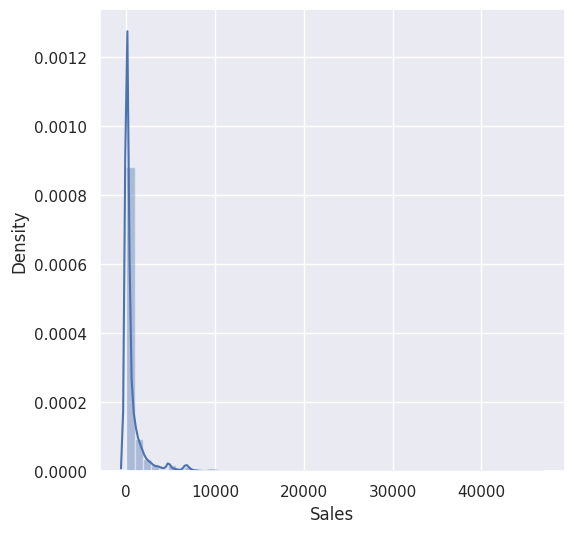

In [13]:
# Items Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Sales'])
plt.show()

Categorical Features

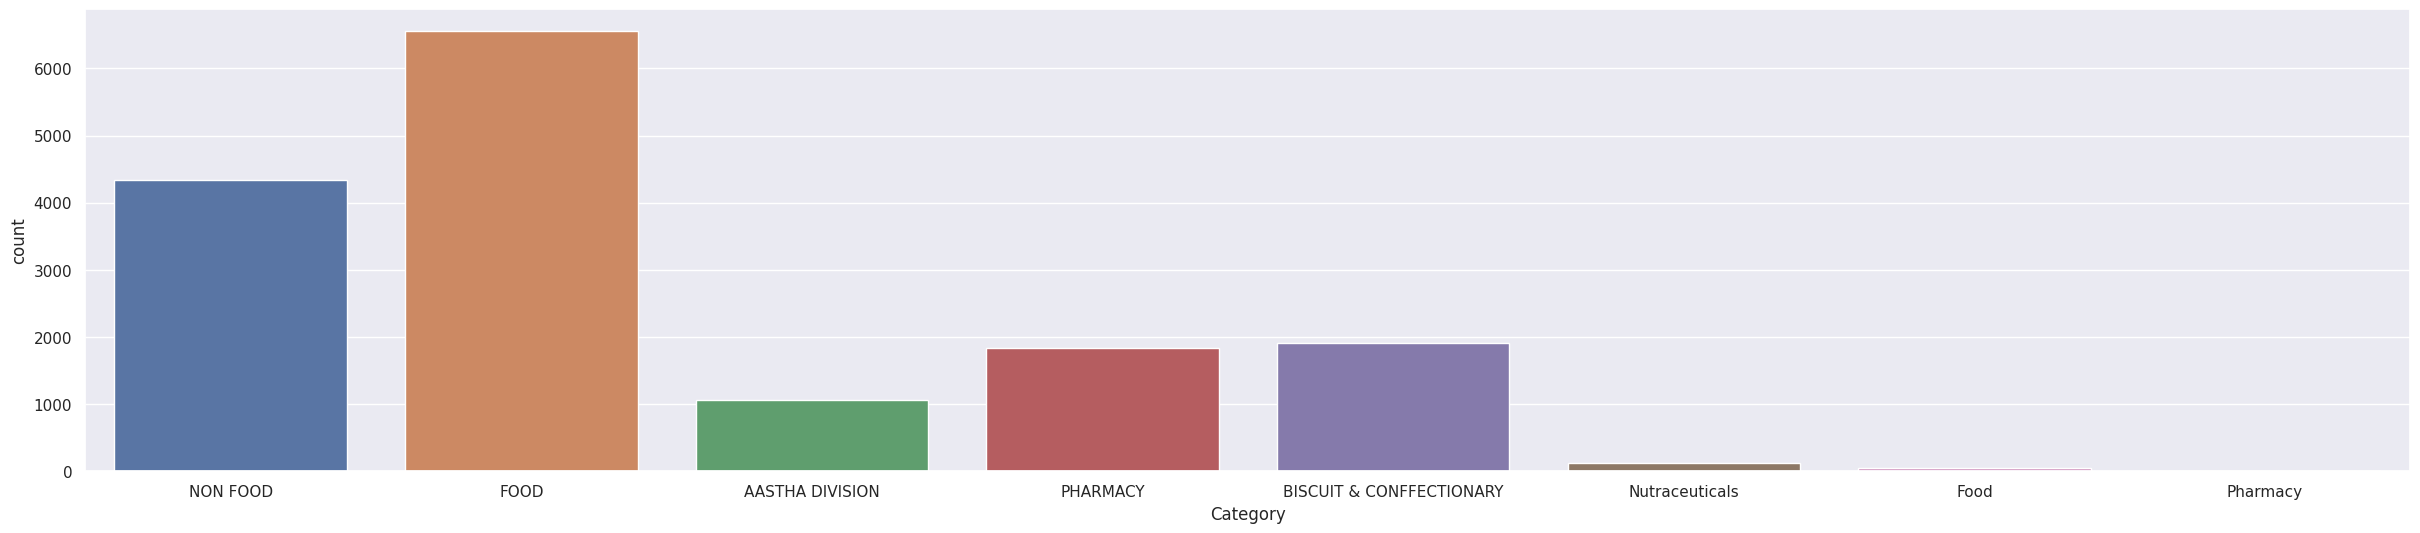

In [14]:
# Item Category column
plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=data)
plt.show()

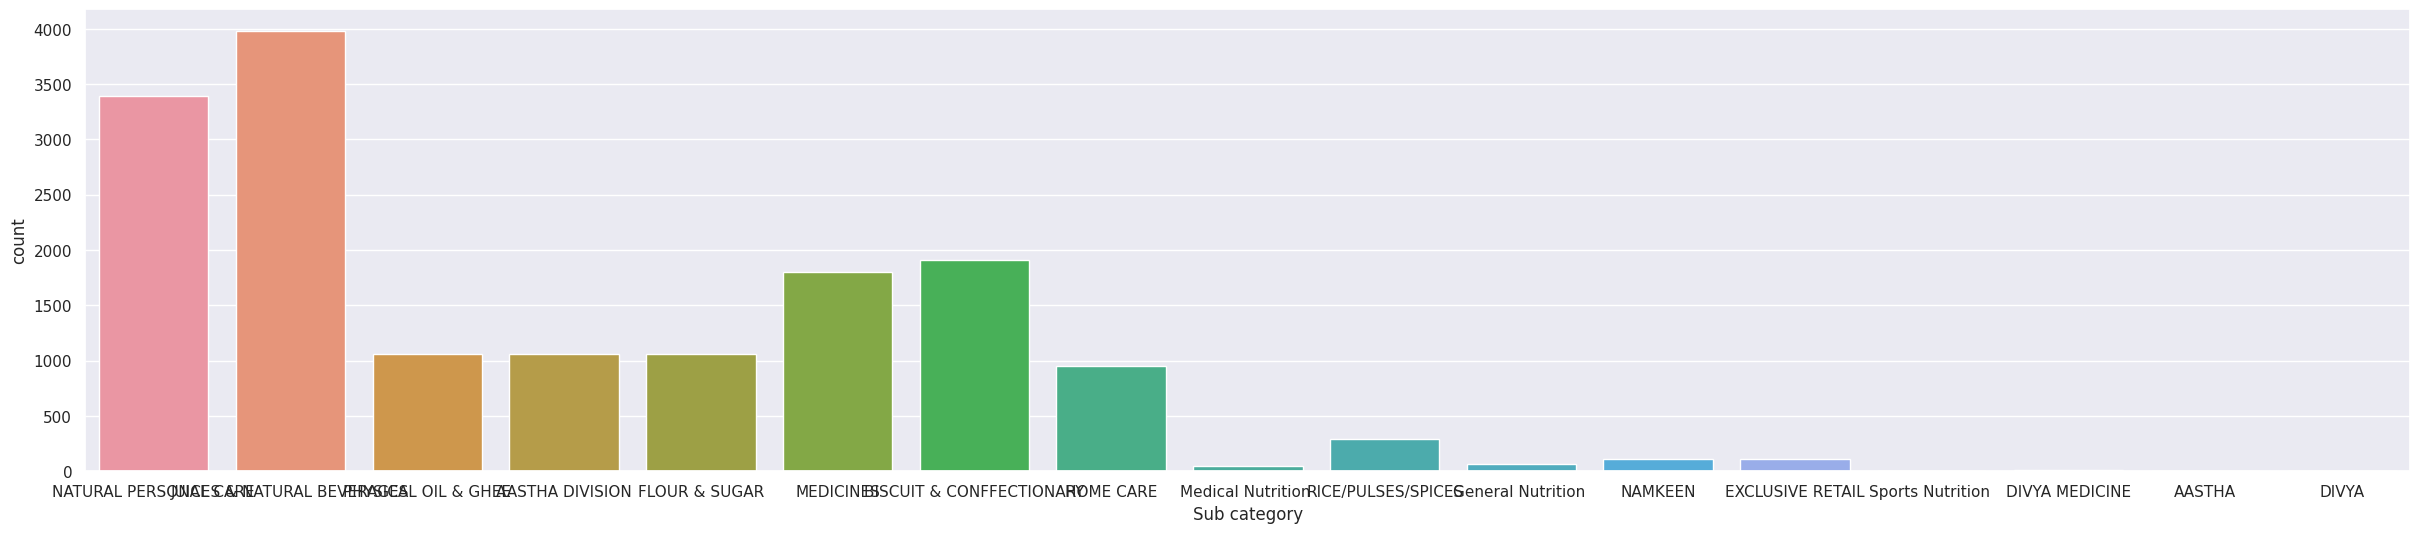

In [15]:
# Item Subcategory column
plt.figure(figsize=(30,6))
sns.countplot(x='Sub category', data=data)
plt.show()

Data Pre-Processing

In [16]:
data.head(10)

Category                Sub category    PRODUCT BRANDS  Order Date  \
0         NON FOOD       NATURAL PERSONAL CARE          EYE DROP  04-04-2022   
1             FOOD  JUICES & NATURAL BEVERAGES          MEDICINE  04-04-2022   
2             FOOD  JUICES & NATURAL BEVERAGES   SHARBAT THANDAI  04-04-2022   
3             FOOD         PHYSICAL OIL & GHEE              GHEE  04-04-2022   
4             FOOD  JUICES & NATURAL BEVERAGES  MURRABBA & CANDY  04-04-2022   
5  AASTHA DIVISION             AASTHA DIVISION      AASTHA DHOOP  04-04-2022   
6             FOOD  JUICES & NATURAL BEVERAGES   SHARBAT THANDAI  04-04-2022   
7         NON FOOD       NATURAL PERSONAL CARE          EYE DROP  04-04-2022   
8             FOOD  JUICES & NATURAL BEVERAGES   SHARBAT THANDAI  04-04-2022   
9         NON FOOD       NATURAL PERSONAL CARE          EYE DROP  04-04-2022   

   Item Code                      Item Name  Item Disc %  Item disc amount  \
0      71076          SAUMYA EYE DROP 10 ML          8.0          2.500000   
1      70853    GILOY GHAN VATI 60 PC (NEW)         10.0          8.928571   
2       1095           GULAB SHARBAT 750 ML          8.0          6.779661   
3       1379               COWS GHEE 15 LTR          8.3       3855.053571   
4       1025      AMLA CHATPATA CANDY 500 G         10.0        325.714286   
5      70903  AASTHA SANDAL DHOOP -20 STICK          8.0          2.285714   
6       1095           GULAB SHARBAT 750 ML         10.0          8.474576   
7      71076          SAUMYA EYE DROP 10 ML         10.0          3.125000   
8       1095           GULAB SHARBAT 750 ML         10.0        203.389830   
9      70795   DRISHTI EYE DROP 10 ML (NEW)          5.0          0.892857   

   Profit %  Item Net Amount     profit   MRP     Net cost  quantity  \
0  16.53831            32.20    4.08000    35    31.250000         1   
1  13.98176            90.00    9.85714   100    89.285714         1   
2  16.76816            92.00   11.19610   100    84.745763         1   
3   0.52727         47702.34  223.39500  8670  7741.071429         6   
4  13.67105          3078.00  352.55857   180   171.428571        19   
5  23.23354            27.60    4.95571    30    28.571429         1   
6  14.22972            90.00    9.50119   100    84.745763         1   
7  14.00486            31.50    3.45500    35    31.250000         1   
8  14.22972          2160.00  228.02847   100    84.745763        24   
9  20.31408            19.00    2.86429    20    17.857143         1   

      Sales  weight  
0     31.25   0.030  
1     89.29   0.060  
2     84.75   1.130  
3  46446.43  86.880  
4   3257.14  11.381  
5     28.57   0.160  
6     84.75   1.130  
7     31.25   0.030  
8   2033.90  27.120  
9     17.86   0.030

Label Encoding

In [17]:
encoder = LabelEncoder()


In [18]:
data['Category'] = encoder.fit_transform(data['Category'])

data['Sub category'] = encoder.fit_transform(data['Sub category'])

data['PRODUCT BRANDS'] = encoder.fit_transform(data['PRODUCT BRANDS'])

data['Item Name'] = encoder.fit_transform(data['Item Name'])

data['Order Date'] = encoder.fit_transform(data['Order Date'])


In [19]:
data.head()

Category  Sub category  PRODUCT BRANDS  Order Date  Item Code  Item Name  \
0         4            13              36          29      71076        605   
1         2             9              66          29      70853        352   
2         2             9              87          29       1095        362   
3         2            14              40          29       1379        134   
4         2             9              68          29       1025         60   

   Item Disc %  Item disc amount  Profit %  Item Net Amount     profit   MRP  \
0          8.0          2.500000  16.53831            32.20    4.08000    35   
1         10.0          8.928571  13.98176            90.00    9.85714   100   
2          8.0          6.779661  16.76816            92.00   11.19610   100   
3          8.3       3855.053571   0.52727         47702.34  223.39500  8670   
4         10.0        325.714286  13.67105          3078.00  352.55857   180   

      Net cost  quantity     Sales  weight  
0    31.250000         1     31.25   0.030  
1    89.285714         1     89.29   0.060  
2    84.745763         1     84.75   1.130  
3  7741.071429         6  46446.43  86.880  
4   171.428571        19   3257.14  11.381

Splitting features and Target

In [20]:
X = data.drop(columns='Sales', axis=1)
Y = data['Sales']

In [21]:
print(X)

       Category  Sub category  PRODUCT BRANDS  Order Date  Item Code  \
0             4            13              36          29      71076   
1             2             9              66          29      70853   
2             2             9              87          29       1095   
3             2            14              40          29       1379   
4             2             9              68          29       1025   
...         ...           ...             ...         ...        ...   
15851         2             9              65         336  180002669   
15852         6            10              33         336      83550   
15853         2             9              66         336      81435   
15854         6            10              13         336      81516   
15855         4            13              57         336      71311   

       Item Name  Item Disc %  Item disc amount  Profit %  Item Net Amount  \
0            605          8.0          2.500000  16.53831

In [22]:
print(Y)

0           31.25
1           89.29
2           84.75
3        46446.43
4         3257.14
           ...   
15851       66.96
15852     2250.00
15853      234.29
15854     1238.10
15855        0.85
Name: Sales, Length: 15856, dtype: float64


Splitting the data into Training data & Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(15856, 15) (12684, 15) (3172, 15)


Machine Learning Model Training

XGBoost Regressor

In [25]:
regressor = XGBRegressor()

In [26]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [27]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [28]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [29]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999780714114548


In [30]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [31]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
absolute_error = metrics.mean_absolute_error(Y_test, test_data_prediction)
squared_error = metrics.mean_squared_error(Y_test, test_data_prediction)

In [32]:
print('R Squared value = ', r2_test)
print('absolute error = ',absolute_error)
print('squared error = ',squared_error)

R Squared value =  0.9994578497426356
absolute error =  9.107576541990833
squared error =  947.7248036349421


# Save my model

In [33]:
import joblib

In [34]:
joblib.dump(regressor,r'C:\Users\Tms\Dropbox\PC\Desktop\sales ml\XG_boost_model.sav')

['C:\\Users\\Tms\\Dropbox\\PC\\Desktop\\sales ml\\XG_boost_model.sav']

In [35]:
model=joblib.load(r'C:\Users\Tms\Dropbox\PC\Desktop\sales ml\XG_boost_model.sav')

In [36]:
l=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(Y_test, l)


0.9994578497426356